Justin Luo - 862013749

Moses Park - 861256602

Thomas Chin - 861290572

In [0]:
import pandas as pd
df = pd.read_csv("top1000.csv",  sep=',' , encoding='latin-1')
df

,ID,IMDB_rating,Title,Rated,Runtime,Genre,Votes,Gross,Metascore
0,tt0111161,9.3,The Shawshank Redemption,R,142 min,Drama,2194115.0,$28.34M,80.0
1,tt0068646,9.2,The Godfather,R,175 min,Crime Drama,1511727.0,$134.97M,100.0
2,tt0468569,9.0,The Dark Knight,PG-13,152 min,Action Crime Drama,2176590.0,$534.86M,84.0
3,tt0071562,9.0,The Godfather: Part II,R,202 min,Crime Drama,1058941.0,$57.30M,90.0
4,tt0167260,8.9,The Lord of the Rings: The Return of the King,PG-13,201 min,Adventure Drama Fantasy,1560333.0,$377.85M,94.0
...,...,...,...,...,...,...,...,...,...
996,tt3390572,8.1,Haider,Not Rated,160 min,Crime Drama Thriller,47432.0,$0.90M,74.0
997,tt3315342,8.1,Logan,R,137 min,Action Drama Sci-Fi,601108.0,$226.28M,77.0
998,tt3170832,8.1,Room,R,118 min,Drama Thriller,338080.0,$14.68M,86.0
999,tt3011894,8.1,Relatos salvajes,R,122 min,Comedy Drama Thriller,160501.0,$3.11M,77.0


In [0]:
df = df[:-1]

In [0]:
df['Runtime'] = df['Runtime'].str.replace('min', '').astype(int)
df.Runtime.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


count    1000.000000
mean      135.682000
std        34.816247
min        45.000000
25%       115.000000
50%       132.000000
75%       156.000000
max       321.000000
Name: Runtime, dtype: float64

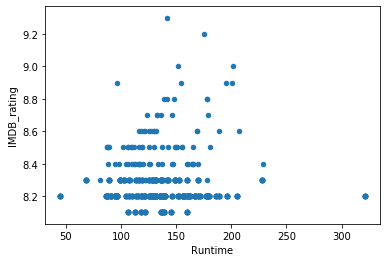

In [0]:
df.plot.scatter(y='IMDB_rating', x='Runtime')

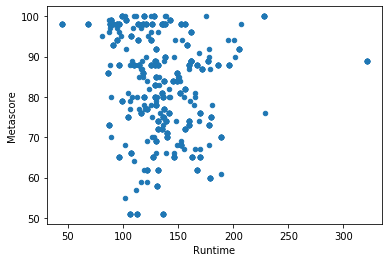

In [0]:
df.plot.scatter(y='Metascore', x='Runtime')

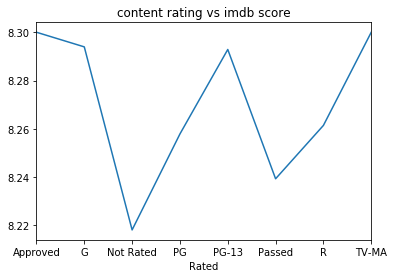

In [0]:
df.groupby("Rated")["IMDB_rating"].mean().plot(title = "content rating vs imdb score")


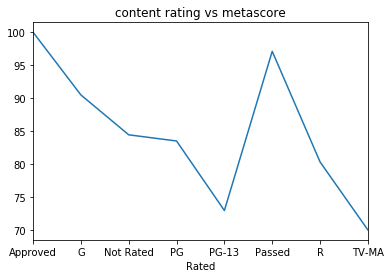

In [0]:
df.groupby("Rated")["Metascore"].mean().plot(title = "content rating vs metascore")


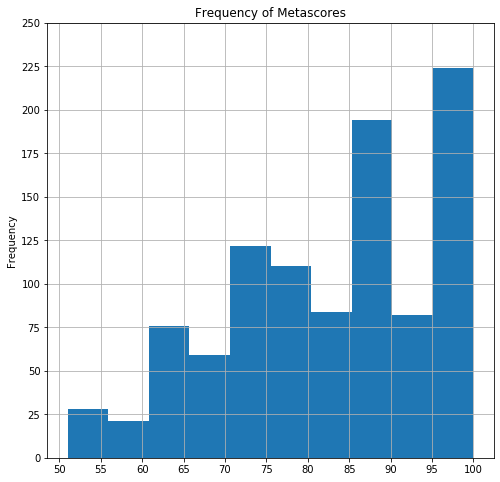

In [0]:
x = [50, 55, 60, 65, 70, 75, 80, 85, 90 ,95, 100]
y = [0, 25, 50, 75, 100 ,125, 150, 175, 200, 225, 250]
df.Metascore.plot.hist(title = "Frequency of Metascores", grid = True, xticks = x, yticks = y, figsize = (8,8))

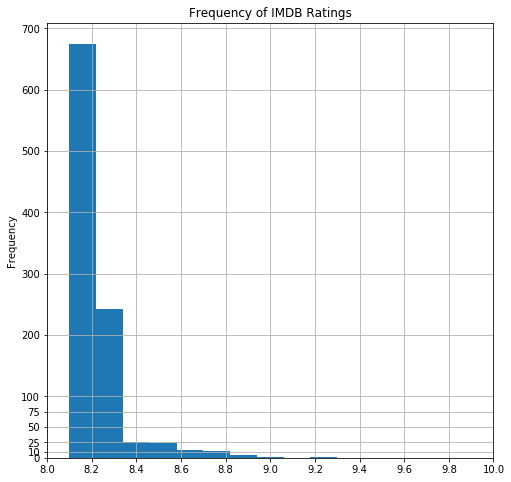

In [0]:
x = [8.0, 8.2, 8.4, 8.6, 8.8, 9.0, 9.2, 9.4, 9.6, 9.8, 10.0]
y = [0, 10, 25, 50 ,75, 100, 200, 300, 400, 500, 600, 700]
df.IMDB_rating.plot.hist(title = "Frequency of IMDB Ratings", grid = True, xticks = x, yticks = y, figsize = (8,8))

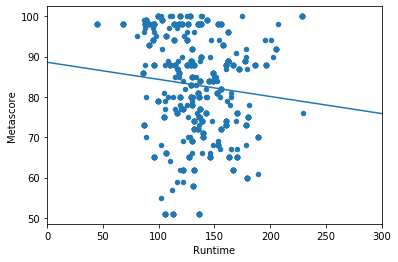

In [0]:
import numpy as np
import pandas as pd
#df = pd.read_csv("top1000.csv")
from sklearn.linear_model import LinearRegression
X_train=df[['Runtime']]
y_train=df['Metascore']
model = LinearRegression()
model.fit(X = X_train, y = y_train )
model.predict(X = X_train)

X_new = pd.DataFrame()

X_new['Runtime'] = np.linspace(0, 300, num=100)


y_new_ = pd.Series(
    model.predict(X_new), 
    index=X_new["Runtime"]    
)
df.plot.scatter(x="Runtime", y="Metascore")
y_new_.plot.line()

Metascore decreases as runtime increases

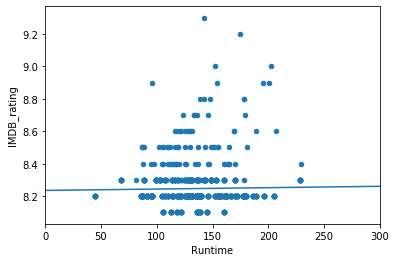

In [0]:
import numpy as np
import pandas as pd
#df = pd.read_csv("top1000.csv")
from sklearn.linear_model import LinearRegression
X_train=df[['Runtime']]
y_train=df['IMDB_rating']
model = LinearRegression()
model.fit(X = X_train, y = y_train )
model.predict(X = X_train)

X_new = pd.DataFrame()

X_new['Runtime'] = np.linspace(0, 300, num=100)


y_new_ = pd.Series(
    model.predict(X_new), 
    index=X_new["Runtime"]    
)
df.plot.scatter(x="Runtime", y="IMDB_rating")
y_new_.plot.line()

No noticable correlation between runtime and imdb score